<a href="https://colab.research.google.com/github/purnachand1186/car_price_analysis/blob/main/prompt_II_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](https://github.com/purnachand1186/car_price_analysis/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Business Objective**: Identify the key factors that influence used car prices ,and below are some of the key business aspects.
1. *Cost*: estimate the price of a used car based on the attributes provided for cars in the dataset more precisely try to answer the below business questions
        1) Is the price of a car dependent on the milage driven ?
        2) Is the price of a car dependent on the engine type and /or horsepower ?


2. *Customers*: Understand what customers are looking for in the used cars to provide them with the best options, to acheive that , analyze the exsting customer data to define the patterns depanding on the income, age, status and education.

3. *Data*: Make sure the provided for this analysis is in a shape to use it for the analysis and for future predictions. Make sure the outliers are removed.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

in '**prompt_II_ver2**' , I am not deleting the null values, instead I am using Imputers to populate null values for both integer and category columns

Read the data from the provided CSV file understand the data before clearning it up

In [55]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [69]:
#import the data
vehicles = pd.read_csv('data/vehicles.csv')
print("Data Size: : " + str(vehicles.shape))

Data Size: : (163141, 18)


In [7]:
#preview data
vehicles.head()

id                  region    price  year manufacturer model  \
0  7222695916                prescott   6000.0   NaN          NaN   NaN   
1  7218891961            fayetteville  11900.0   NaN          NaN   NaN   
2  7221797935            florida keys  21000.0   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500.0   NaN          NaN   NaN   
4  7210384030              greensboro   4900.0   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [83]:
# create a data frame with missing values and percentage of missing values for each column
def missing_df(df):
  total_missing_value = df.isnull().sum()
  percent_missing_value = round(total_missing_value*100/len(df),2)
  missing_valus_df = pd.DataFrame({'count': total_missing_value, 'percentage': percent_missing_value})
  return missing_valus_df

missing_data = missing_df(vehicles)
missing_data[missing_data['count']>0]

Empty DataFrame
Columns: [count, percentage]
Index: []

**Observation** : From the above table, we can observe that 'Size' attribute has around 72 % empty values, 'cyliders' has around 42 % and 'condition' attribute has around 41% of empty values/

In [84]:
# find the unique values in each column
unique_vals = vehicles.nunique(axis=0)
unique_vals

region            148
price            9458
year              293
manufacturer       41
model           16989
condition           6
cylinders           8
fuel                5
odometer        57515
title_status        6
transmission        3
drive               3
size                4
type               13
paint_color        12
state              24
dtype: int64

In [ ]:
# describe data
pd.options.display.float_format = '{:.2f}'.format
vehicles.describe()

id         price      year    odometer
count     426880.00     426880.00 425675.00   422480.00
mean  7311486634.22      75199.03   2011.24    98043.33
std      4473170.41   12182282.17      9.45   213881.50
min   7207408119.00          0.00   1900.00        0.00
25%   7308143339.25       5900.00   2008.00    37704.00
50%   7312620821.00      13950.00   2013.00    85548.00
75%   7315253543.50      26485.75   2017.00   133542.50
max   7317101084.00 3736928711.00   2022.00 10000000.00

**Observation** :  From the above table, we can observe that the price column has a maximum price 373,692,8711 which is an outlier similarly the odometer reading of 1 million is possible but more unlikely in real life.


In [ ]:
vehicles.corr(numeric_only=True)

id  price  year  odometer
id        1.00  -0.00 -0.06      0.01
price    -0.00   1.00 -0.00      0.01
year     -0.06  -0.00  1.00     -0.16
odometer  0.01   0.01 -0.16      1.00

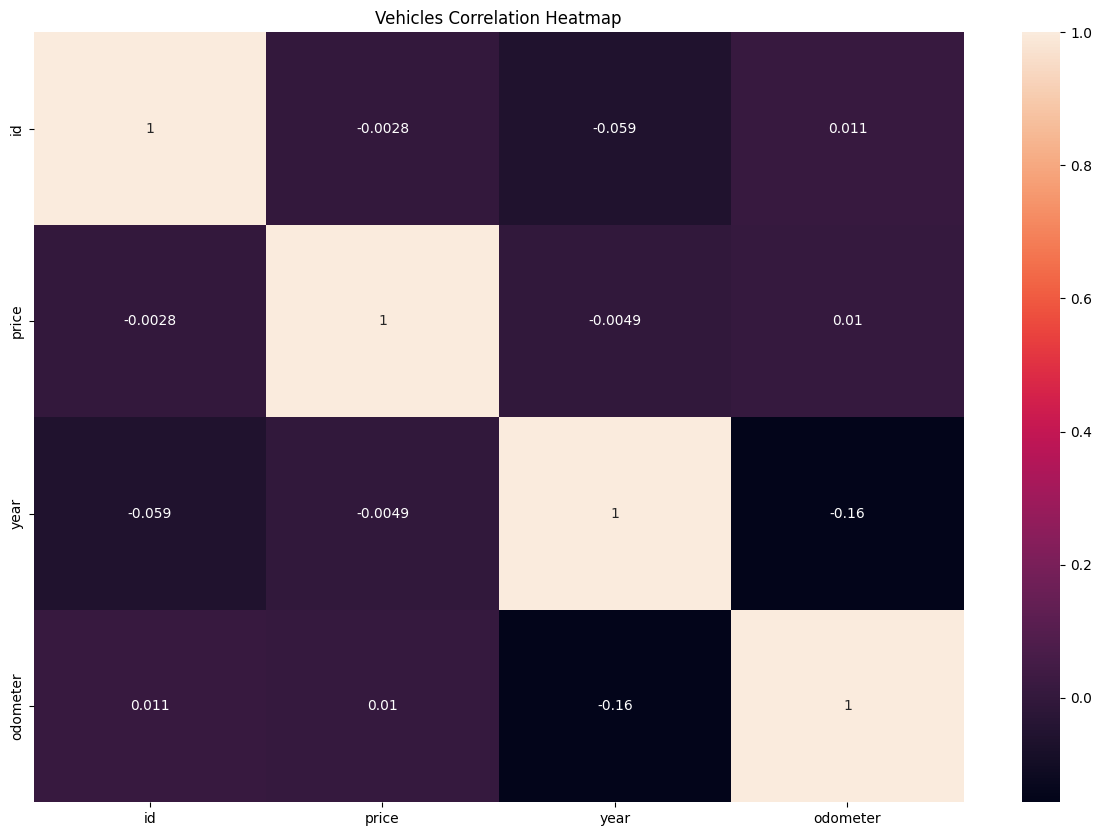

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(vehicles.corr(numeric_only=True), annot=True)
ax.set_title('Vehicles Correlation Heatmap')
plt.show()

**Observation** : From the above Vehicle correlation matrix and the heat map, it is clear that the 'id' attribure does have any relationship with other attributes, and an ideal attribute to delete and it seems odd that the correlation between year and odometer is negtiave, but in real life the older the car and those many miles.

### Time for some Plots

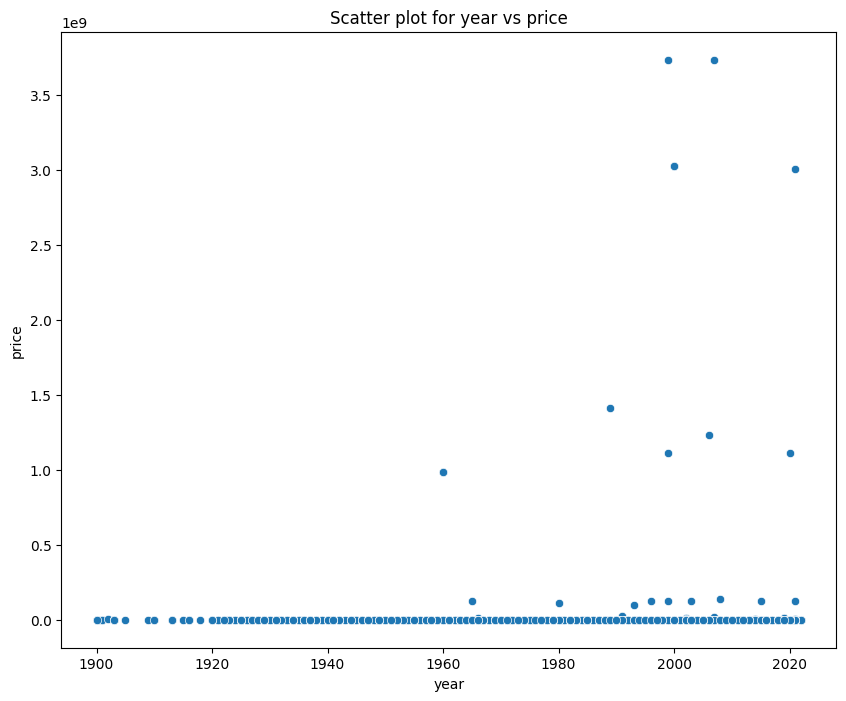

In [ ]:
# draw a plot between price and year

def drawscatterplot(data,x,y):
  fig, ax = plt.subplots(figsize=(10,8))
  fig = sns.scatterplot(data=data, x=x, y=y)
  fig.set_title('Scatter plot for ' + str(x) +' vs ' + str(y))
  fig.set_xlabel(str(x))
  fig.set_ylabel(str(y))
  plt.show()

drawscatterplot(vehicles,'year','price')

In [ ]:
def drawhistplot(data,x,palette):
  fig, ax = plt.subplots(figsize=(10,8))
  fig = sns.histplot(data=data, x=x, palette=palette)
  fig.set_title('Histogram for ' + str(x))

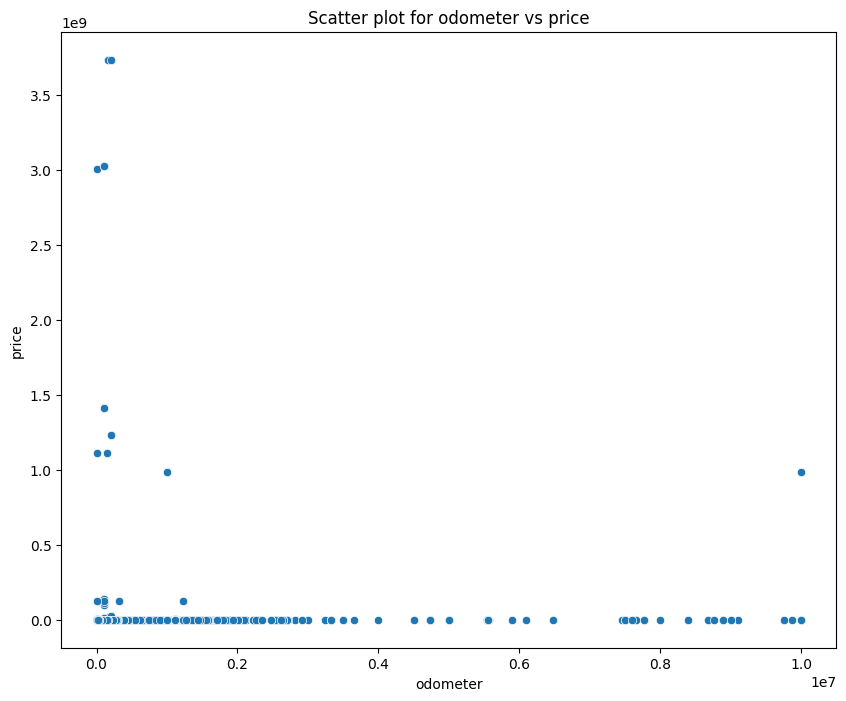

In [ ]:
# draw a plot between price and year
drawscatterplot(vehicles,'odometer','price')

**Observations**: From the above two plots, most of the prices are 0.0 , this could be an issue with NaN values in the price attribute, we will clear this in the data preparation section to re-draw these plots

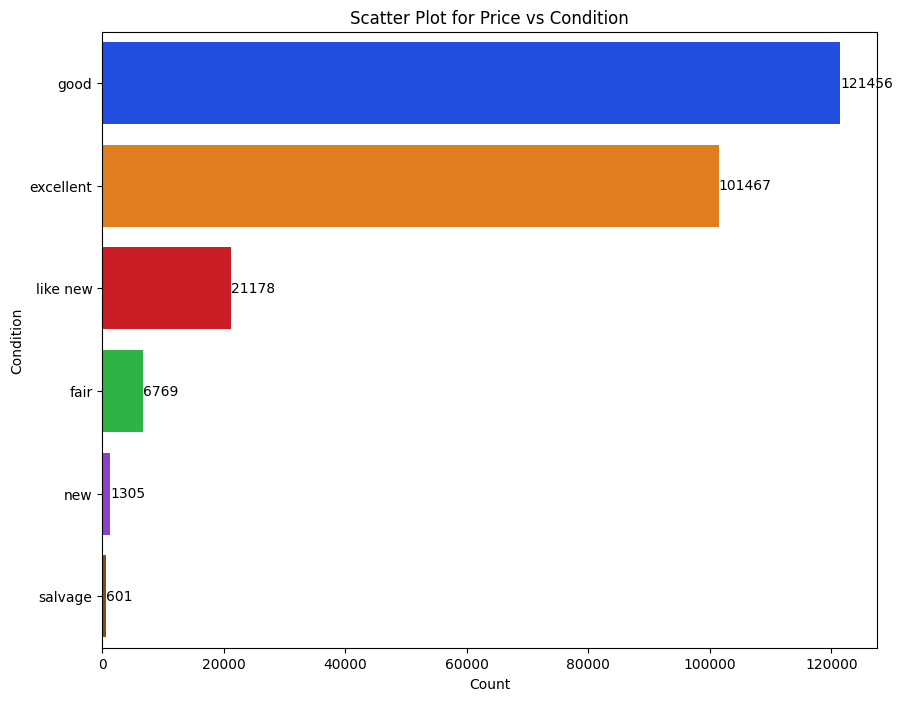

In [ ]:
# draw a plot between condition and year
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.countplot(data=vehicles, y='condition', order=vehicles['condition'].value_counts().index, palette='bright', hue='condition',legend=False)
fig.set_title('Scatter Plot for Price vs Condition')
fig.set_xlabel('Count')
fig.set_ylabel('Condition')
for container in fig.containers:
    fig.bar_label(container)
plt.show()

**Observation**: The provided data has more cars with good condition

<Axes: title={'center': 'Bar Plot for Price vs Condition'}, xlabel='condition', ylabel='price'>

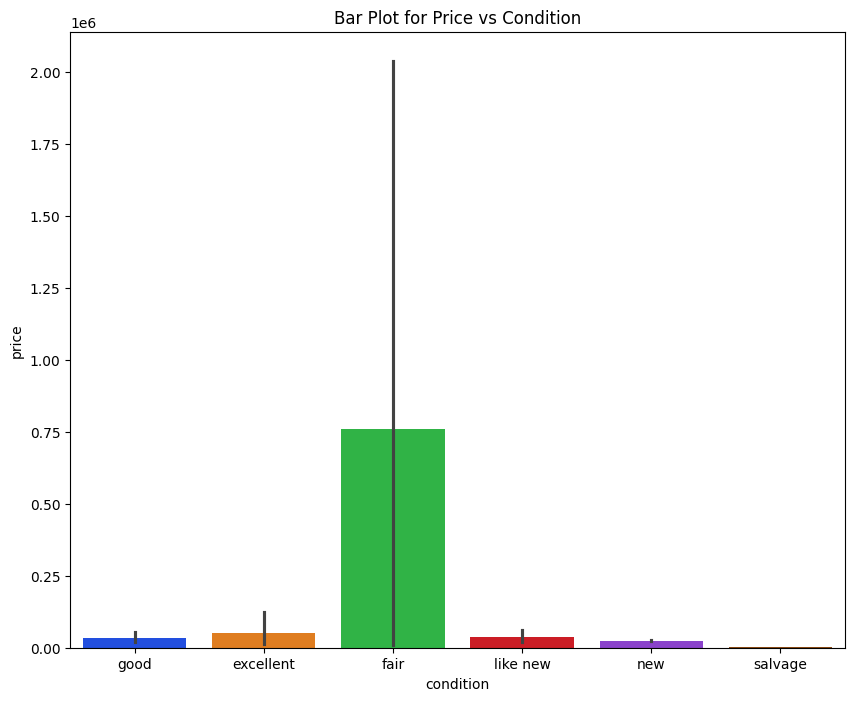

In [ ]:
# generate bar plot between condition, price
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.barplot(data=vehicles, x='condition', y='price', palette='bright', hue='condition',legend=False)
fig.set_title('Bar Plot for Price vs Condition')
fig

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [70]:
# drop unique id & VIN columns
vehicles.drop(columns=['id','VIN'], inplace=True)

# get integer and category columns
cat_cols = vehicles.select_dtypes(include=['object']).columns
num_cols = vehicles.select_dtypes(include=['int64', 'float64']).columns

In [71]:
# check how many null values exists in integer columns before imputing
vehicles.isnull().sum()[num_cols]

price          1
year         747
odometer    2047
dtype: int64

In [72]:
# use interative imputer with KNN to replace empty / nAN values in integer columns
vehciles_num = vehicles[num_cols]
imputer_num = IterativeImputer(KNeighborsRegressor(n_neighbors=15))
impute_data = imputer_num.fit_transform(vehciles_num)
vehicles[num_cols] = impute_data

In [73]:
# check how many null values exists in integer after before imputing
vehicles.isnull().sum()[num_cols]

price       0
year        0
odometer    0
dtype: int64

In [74]:
# check how many null values exists in category columns before imputing
vehicles.isnull().sum()[cat_cols]

region               1
manufacturer      7266
model             2003
condition        65341
cylinders        66539
fuel               982
title_status      3266
transmission       855
drive            50273
size            116725
type             33630
paint_color      47964
state                1
dtype: int64

In [75]:
# use Simple imputer with  replace empty / nAN values in category columns
vehicles_cat = vehicles[cat_cols]
imputer_cat = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
impute_data = imputer_cat.fit_transform(vehicles_cat)
vehicles[cat_cols] = impute_data

In [76]:
# check how many null values exists in category columns after imputing
vehicles.isnull().sum()[cat_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [77]:
vehicles.sample(5)

region    price    year   manufacturer  \
46444              redding  26999.0  2007.0  mercedes-benz   
7709    anchorage / mat-su  45988.0  2018.0           ford   
54756            san diego   4000.0  2004.0          honda   
109885  sarasota-bradenton   7999.0  2005.0           audi   
120670              albany  41590.0  2020.0            bmw   

                         model  condition    cylinders fuel  odometer  \
46444                    sl550       good  8 cylinders  gas   45000.0   
7709                     f-150       good  6 cylinders  gas   13591.0   
54756                 civic ex       good  4 cylinders  gas  195000.0   
109885                      tt  excellent  4 cylinders  gas  112564.0   
120670  5 series 530i sedan 4d       good  6 cylinders  gas   16929.0   

       title_status transmission drive       size         type paint_color  \
46444         clean    automatic   rwd  full-size  convertible      silver   
7709          clean    automatic   4wd  full-size       pickup      silver   
54756         clean    automatic   4wd    compact        sedan        grey   
109885        clean    automatic   4wd  full-size        coupe       black   
120670        clean        other   rwd  full-size        sedan       black   

       state  
46444     ca  
7709      ak  
54756     ca  
109885    fl  
120670    ga

In [78]:
# keep only those records with price & odometer values greater than 0
clean_vehicles = vehicles[(vehicles['price'] > 0) & (vehicles['odometer'] > 0)]
clean_vehicles.head()
print("Data Size: : " + str(clean_vehicles.shape))

Data Size: : (150775, 16)


In [79]:
#delete any duplicates
clean_vehicles.drop_duplicates()

region         price         year manufacturer  \
0                     prescott   6000.000000  2006.200000         ford   
1                 fayetteville  11900.000000  2010.533333         ford   
2                 florida keys  21000.000000  2015.066667         ford   
3       worcester / central MA   1500.000000  2013.666667         ford   
4                   greensboro   4900.000000  2008.600000         ford   
...                        ...           ...          ...          ...   
163133              sioux city  35000.000000  2010.000000         ford   
163137              sioux city  11000.000000  2014.000000         ford   
163138              sioux city   1900.000000  1987.000000         ford   
163139              sioux city   1000.000000  2006.000000       nissan   
163140         fresno / madera   7182.666667  2007.400000         ford   

           model condition    cylinders    fuel       odometer title_status  \
0          f-150      good  6 cylinders     gas  151023.866667        clean   
1          f-150      good  6 cylinders     gas   86369.400000        clean   
2          f-150      good  6 cylinders     gas   94139.266667        clean   
3          f-150      good  6 cylinders     gas   77799.666667        clean   
4          f-150      good  6 cylinders     gas  135829.466667        clean   
...          ...       ...          ...     ...            ...          ...   
163133     f-350      good  8 cylinders  diesel  131300.000000        clean   
163137  explorer      good  6 cylinders     gas  178489.000000        clean   
163138   foxbody      good  6 cylinders     gas   57000.000000        clean   
163139    maxima      good  6 cylinders     gas  150015.000000        clean   
163140     f-150      good  6 cylinders     gas  117350.266667        clean   

       transmission drive       size   type paint_color state  
0         automatic   4wd  full-size  sedan       white    az  
1         automatic   4wd  full-size  sedan       white    ar  
2         automatic   4wd  full-size  sedan       white    fl  
3         automatic   4wd  full-size  sedan       white    ma  
4         automatic   4wd  full-size  sedan       white    nc  
...             ...   ...        ...    ...         ...   ...  
163133    automatic   4wd  full-size  truck       white    ia  
163137    automatic   4wd  full-size  wagon       white    ia  
163138    automatic   4wd  full-size  sedan       white    ia  
163139    automatic   fwd    compact  sedan         red    ia  
163140    automatic   4wd  full-size  sedan       white    ca  

[131215 rows x 16 columns]

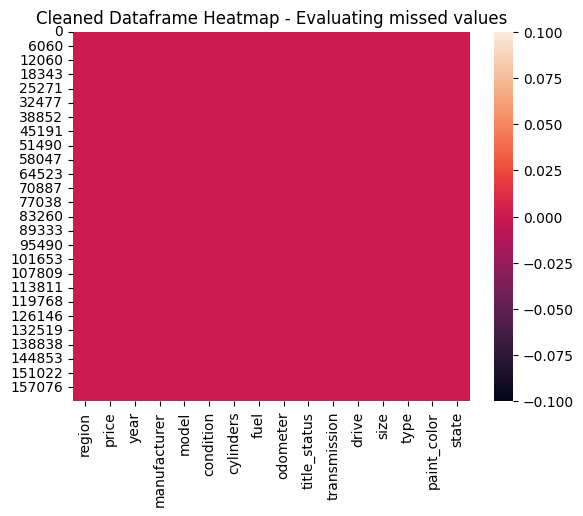

In [81]:
#making sure there are no null or empty values
ax = sns.heatmap(
	clean_vehicles.isnull()
)
ax.set_title("Cleaned Dataframe Heatmap - Evaluating missed values")
plt.show()

In [85]:
missing_data = missing_df(clean_vehicles)
missing_data[missing_data['count']>0]

Empty DataFrame
Columns: [count, percentage]
Index: []

In [86]:
clean_vehicles.reset_index(drop=True, inplace=True)

In [ ]:
#drawhistplot(clean_vehicles,'price','viridis')

fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(data=clean_vehicles, x='price', palette='bright', hue='condition', ax=ax[0])
fig.set_title('Histogram for Price')
fig = sns.histplot(data=clean_vehicles, x='odometer', palette='bright', hue='condition',ax=ax[1])
fig.set_title('Histogram Plot for Odometer')
fig.show()


### Identify Outliers

In this section we will try to indetify outliers from price, odometer, year columns and modify the data

we will use 1.5*IQR to find any value above 3rd quartile or below first quartile and remove them

We will deleting outliers for Price, Odomter, and Year attributes

In [ ]:
def remove_outliers(df, column):
    factor =1.5
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

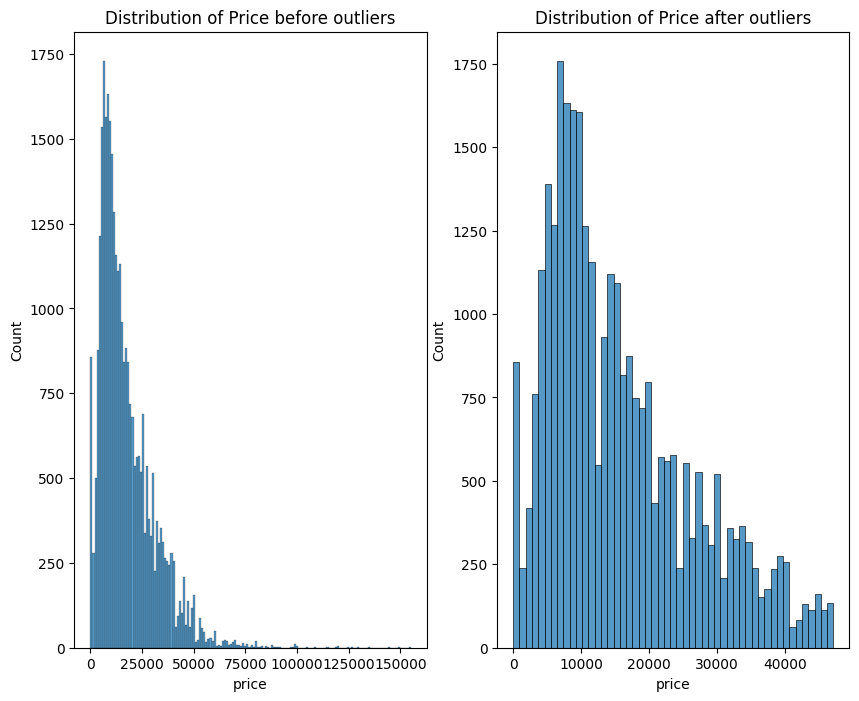

In [ ]:
#before & after deleting outliers for price
fig, ax= plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['price'], ax= ax[0]).set(title='Distribution of Price before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'price')
fig = sns.histplot(clean_vehicles['price'], ax=ax[1]).set(title='Distribution of Price after outliers')
plt.show()

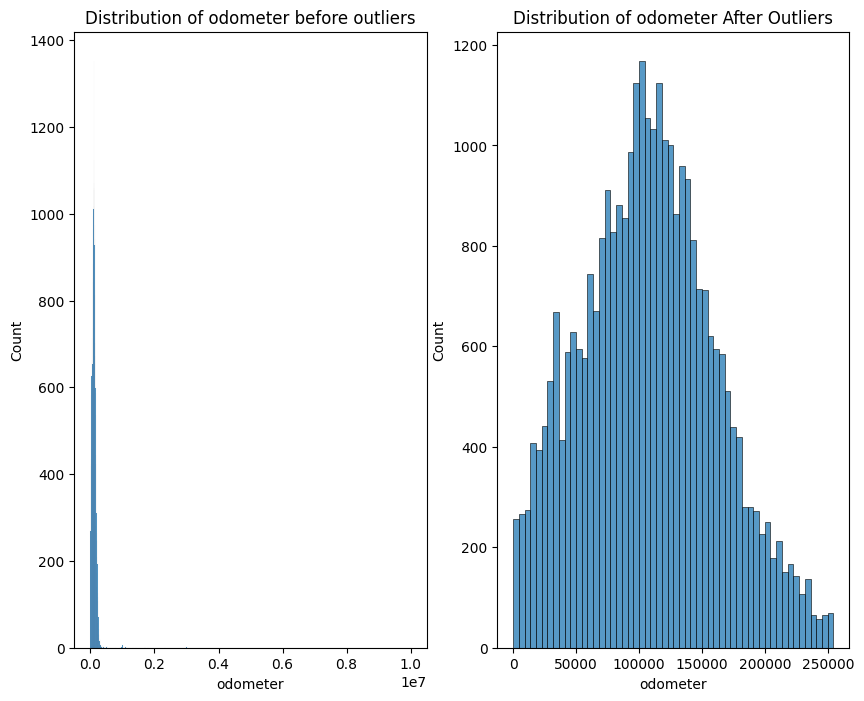

In [ ]:
#before & after deleting outliers for odomater
fig, ax = plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['odometer'], ax =ax[0]).set(title='Distribution of odometer before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'odometer')
fig = sns.histplot(clean_vehicles['odometer'],ax=ax[1]).set(title='Distribution of odometer After Outliers')
plt.show()

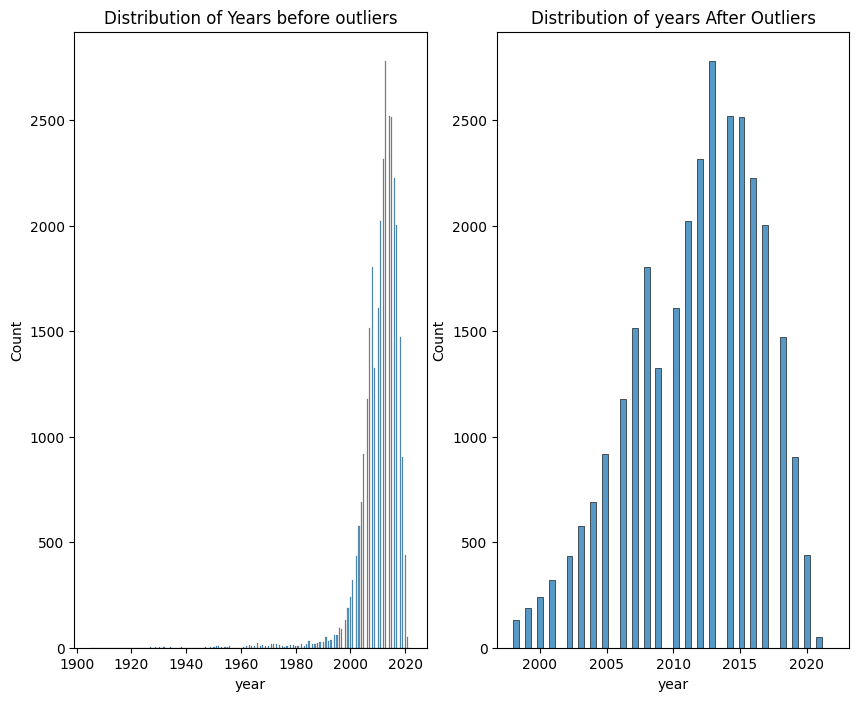

In [ ]:
#before & after deleting outliers for year
fig, ax = plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['year'], ax=ax[0]).set(title='Distribution of Years before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'year')
fig = sns.histplot(clean_vehicles['year'], ax= ax[1]).set(title='Distribution of years After Outliers')

<Axes: title={'center': 'Histogram Plot for year'}, xlabel='year', ylabel='Count'>

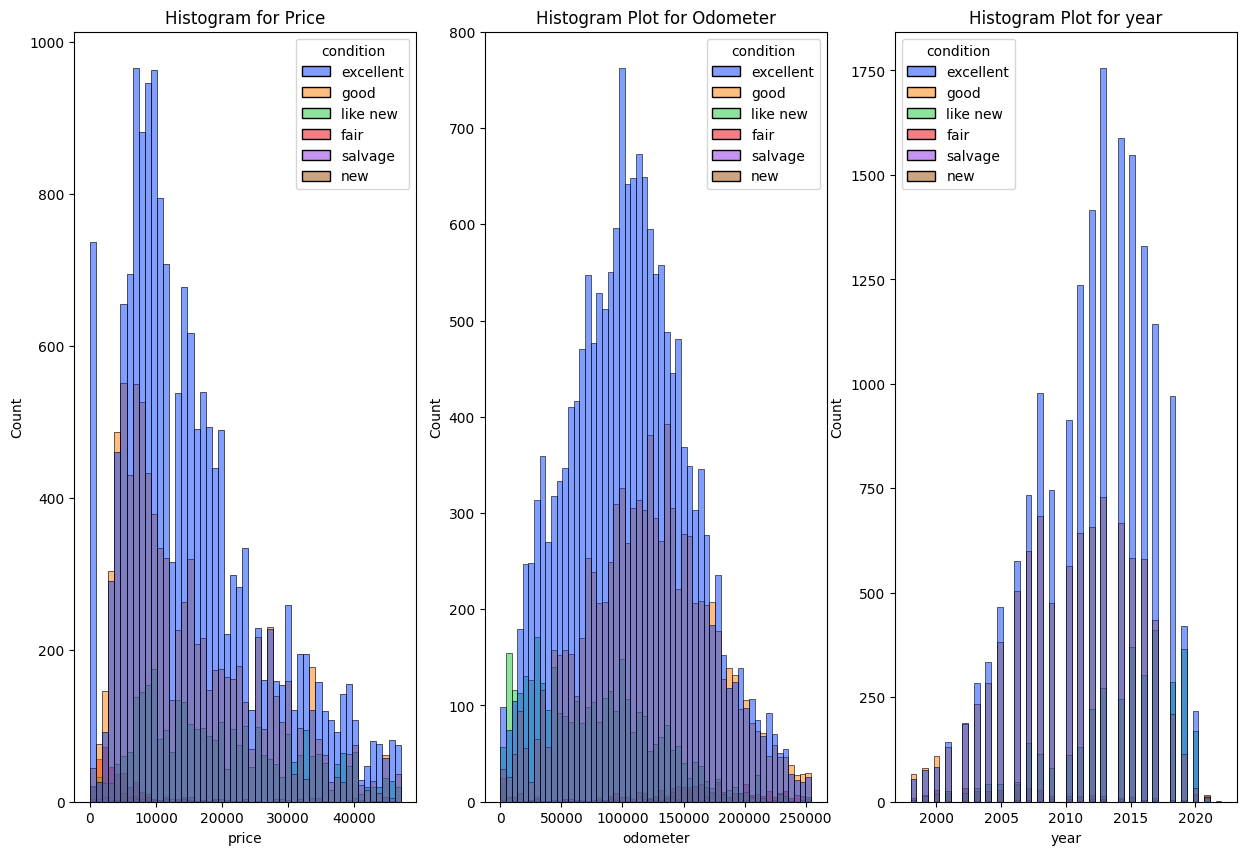

In [ ]:
# draw histograms of price, odometer & year with hue as condition
fig, ax = plt.subplots(1,3,figsize=(15,10))
fig = sns.histplot(data=clean_vehicles, x='price', palette='bright', hue='condition', ax=ax[0])
fig.set_title('Histogram for Price')
fig = sns.histplot(data=clean_vehicles, x='odometer', palette='bright', hue='condition',ax=ax[1])
fig.set_title('Histogram Plot for Odometer')
fig = sns.histplot(data=clean_vehicles, x='year', palette='bright', hue='condition',ax=ax[2])
fig.set_title('Histogram Plot for year')
fig

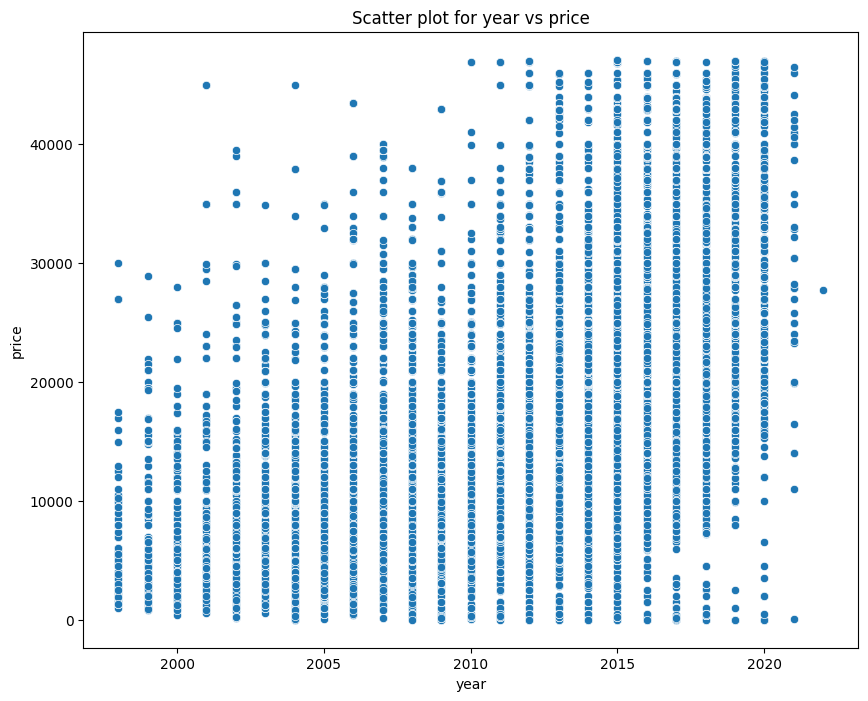

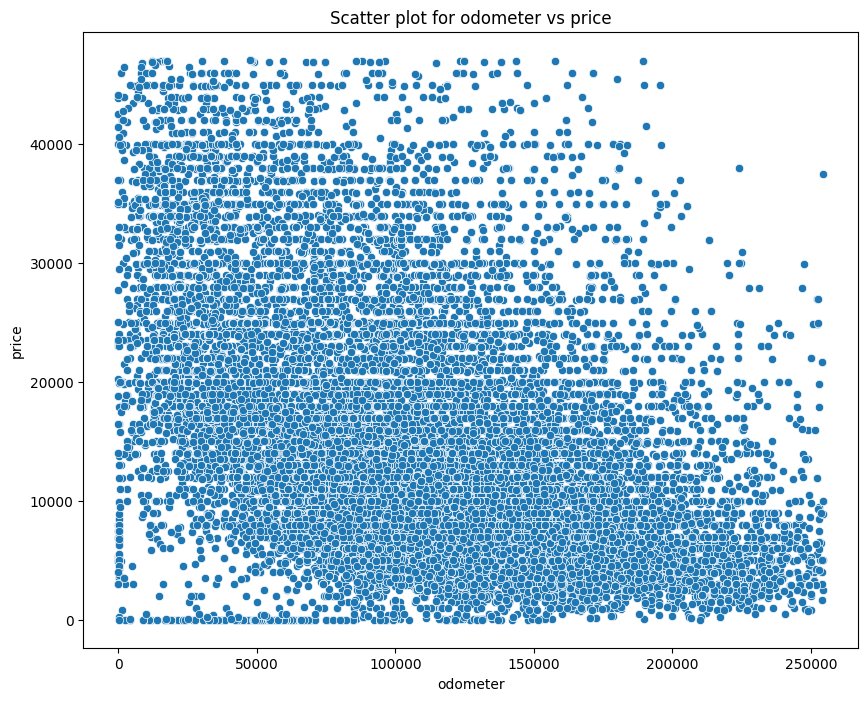

In [ ]:
# comnapring scatter plots for year & odometer with prices after deleting outliers
drawscatterplot(clean_vehicles,'year','price')
drawscatterplot(clean_vehicles,'odometer','price')

### Convert Categorical values into inter values

In [ ]:
#get category columns from the data
cat_cols = clean_vehicles.select_dtypes(include=['object']).columns
cat_cols

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [ ]:
# encode the category column values and create a dictionary
le = LabelEncoder()
le_encorers = {}
for col in cat_cols:
    #clean_vehicles[col] = le.fit_transform(clean_vehicles[col])
    encoded_values = le.fit_transform(clean_vehicles[col])
    le_name_mapping = dict(zip(encoded_values, clean_vehicles[col]))
    clean_vehicles[col] = encoded_values
    le_encorers[col] = le_name_mapping
    print('Feature', col)
    print('mapping', le_name_mapping)

Feature region
mapping {'birmingham': 28, 'dothan': 80, 'florence / muscle shoals': 106, 'gadsden-anniston': 116, 'huntsville / decatur': 145, 'mobile': 212, 'montgomery': 217, 'tuscaloosa': 354, 'anchorage / mat-su': 8, 'kenai peninsula': 160, 'flagstaff / sedona': 103, 'mohave county': 214, 'phoenix': 261, 'prescott': 269, 'show low': 306, 'tucson': 352, 'yuma': 387, 'fayetteville': 101, 'fort smith': 110, 'jonesboro': 155, 'little rock': 187, 'texarkana': 345, 'bakersfield': 18, 'chico': 56, 'fresno / madera': 114, 'gold country': 120, 'humboldt county': 143, 'imperial county': 146, 'inland empire': 148, 'los angeles': 190, 'mendocino county': 206, 'merced': 207, 'modesto': 213, 'monterey bay': 216, 'orange county': 250, 'palm springs': 255, 'redding': 277, 'reno / tahoe': 278, 'sacramento': 286, 'san diego': 293, 'san luis obispo': 294, 'santa barbara': 297, 'santa maria': 299, 'SF bay area': 0, 'siskiyou county': 310, 'stockton': 339, 'susanville': 340, 'ventura county': 361, 'vis

In [ ]:
clean_vehicles.head()

region  price    year  manufacturer  model  condition  cylinders  fuel  \
0      28   4000 2002.00            35   1383          0          3     2   
2      28   9000 2008.00            22   2747          0          3     2   
3      28   8950 2011.00            10   1702          0          5     2   
6      28   9400 2008.00            23    669          2          5     2   
7      28   7300 2007.00            20   3317          2          5     2   

   odometer  title_status  transmission  drive  type  paint_color  state  
0 155000.00             0             0      1     9            1      1  
2  56700.00             0             0      2     2           10      1  
3 164000.00             0             0      1    10           10      1  
6 129473.00             0             0      2     9            9      1  
7 181000.00             0             0      1     0           10      1

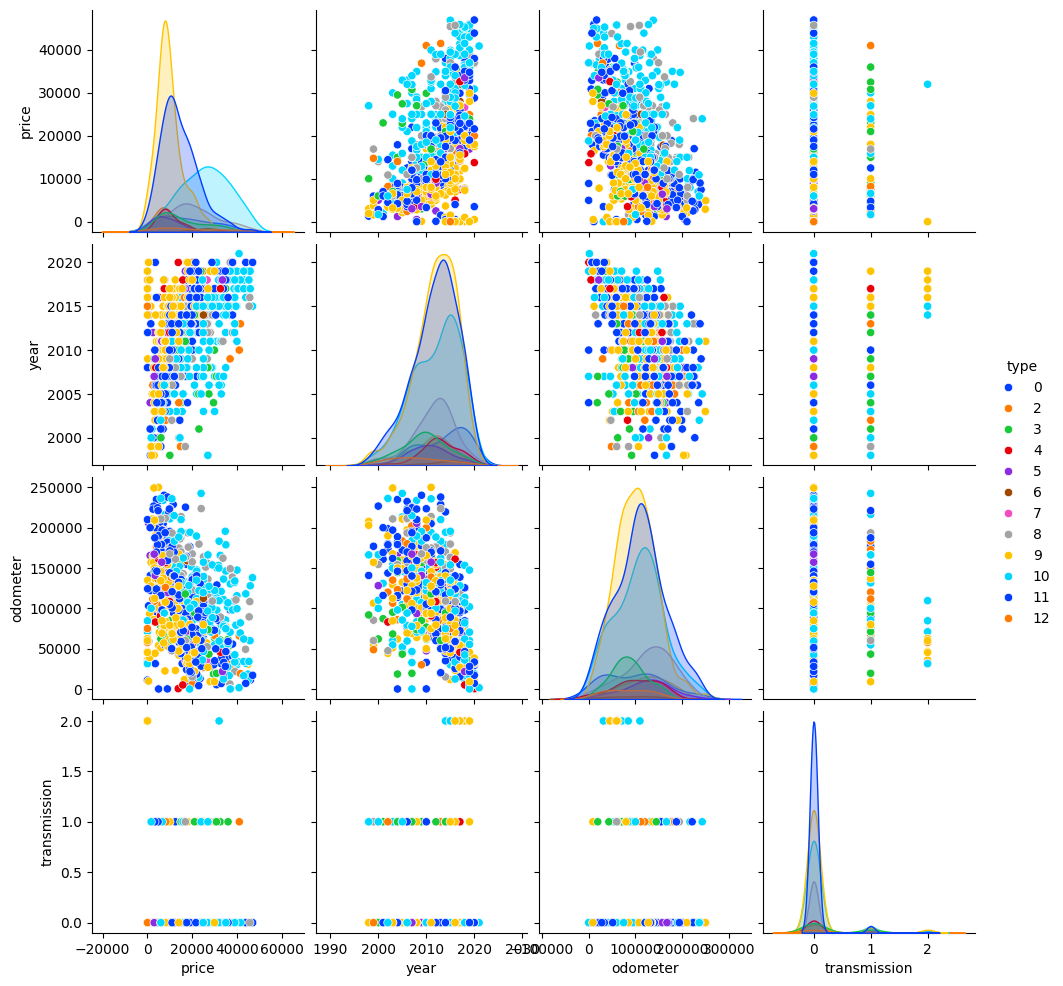

In [ ]:
#draw pariplot among set of fields

def sample_data(df,cols,no_of_samples,random_state):
    return df[cols].sample(n=no_of_samples, random_state=random_state)

def drawpairplot(df,hue,palette):
  sns.pairplot(df, hue=hue, palette=palette)
  plt.show()

drawpairplot(sample_data(clean_vehicles,['price', 'year','odometer', 'transmission','type'],1000,1),'type','bright')

**Observations**:


1.   There is a possitive corrleation between price and year
2.   There is a negetive correlation between price and odometer



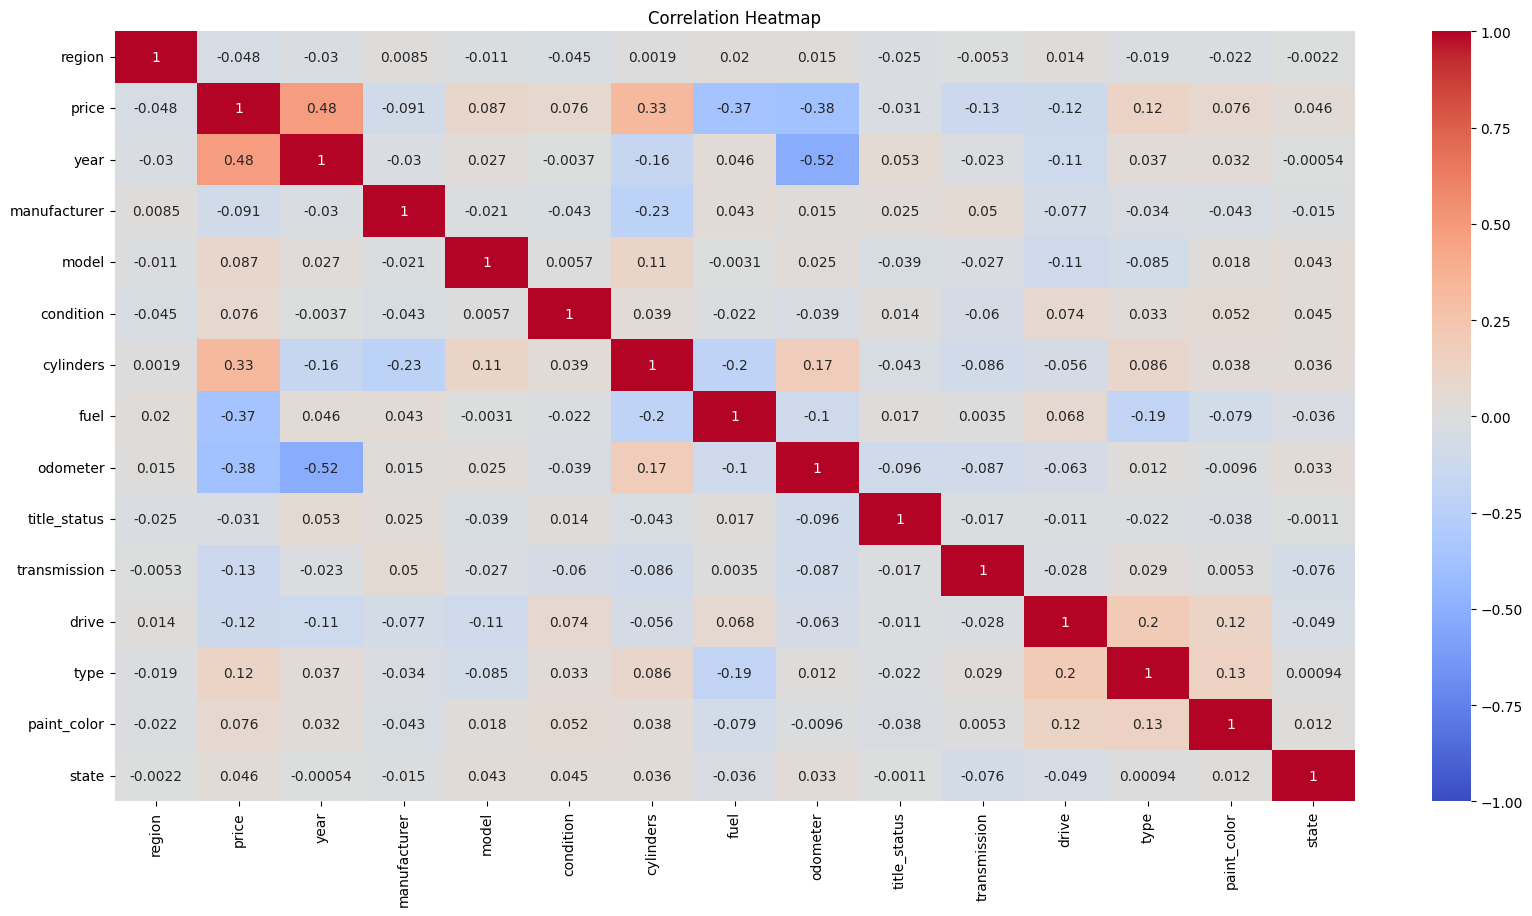

In [ ]:
#Create a correlation Heatmap with all columns
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(clean_vehicles.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap');

**Observations**:


1.   As expected price and Year has positive correlation
2.   Price and number of cylinders has postive correlation
3.   Surprisngly paint color also has positive correlation with price, type and drive types
4.   year has negative correlation with odometer and surprisngly with fule type
5.   Cylinders and fuel has negative correlation

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

I will split my data into train and development data sets and will use Linear Regression, Ridge and Lasso models to define best model

In [ ]:
# split data into train and development data
X = clean_vehicles.drop(columns=['price'])
y = clean_vehicles['price']

In [ ]:
# use train and test split method to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


###LInear Regression

In [ ]:
# collect all model results in a list for final comparision
results = []

# define a simple Linear Regression model and find MSE, MAE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
train_predicts_ln = pipeline.predict(X_train)
test_predicts_ln = pipeline.predict(X_test)

train_mse_ln = mean_squared_error(y_train, train_predicts_ln)
test_mse_ln = mean_squared_error(y_test, test_predicts_ln)
train_mae_ln = mean_absolute_error(y_train, train_predicts_ln)
test_mae_ln = mean_absolute_error(y_test, test_predicts_ln)

print(f"Linear Model: train_mse={train_mse_ln}, test_mse={test_mse_ln}")
print(f"Linear Model: train_mae={train_mae_ln}, test_mae={test_mae_ln}")
print(f"Model Accuracy: {round(pipeline.score(X_test, y_test)*100,2)}")
print(f"Model Coefficients: {pipeline.named_steps['model'].coef_}")
print(f"Model Intercepts: {pipeline.named_steps['model'].intercept_}")

simple_linear_results = {
    'model': 'Linear Regression',
    'train_mse': train_mse_ln,
    'test_mse': test_mse_ln,
    'train_mae': train_mae_ln,
    'test_mae': test_mae_ln,
    'accuracy': round(pipeline.score(X_test, y_test)*100,2),
    'coefficients': pipeline.named_steps['model'].coef_,
    'intercept': pipeline.named_steps['model'].intercept_
}
results.append(simple_linear_results)

Linear Model: train_mse=49692607.42677545, test_mse=48487860.42342094
Linear Model: train_mae=5151.090584111946, test_mae=5137.330941651753
Model Accuracy: 58.21
Model Coefficients: [ -297.26203755  4196.94710531   283.94560111   326.05271066
   478.2801687   3792.58570231 -3487.83316793 -3127.33992706
  -657.0185376  -1292.23908483  -721.10169304   304.32604979
   202.95415519   144.62506296]
Model Intercepts: 15759.2559163195


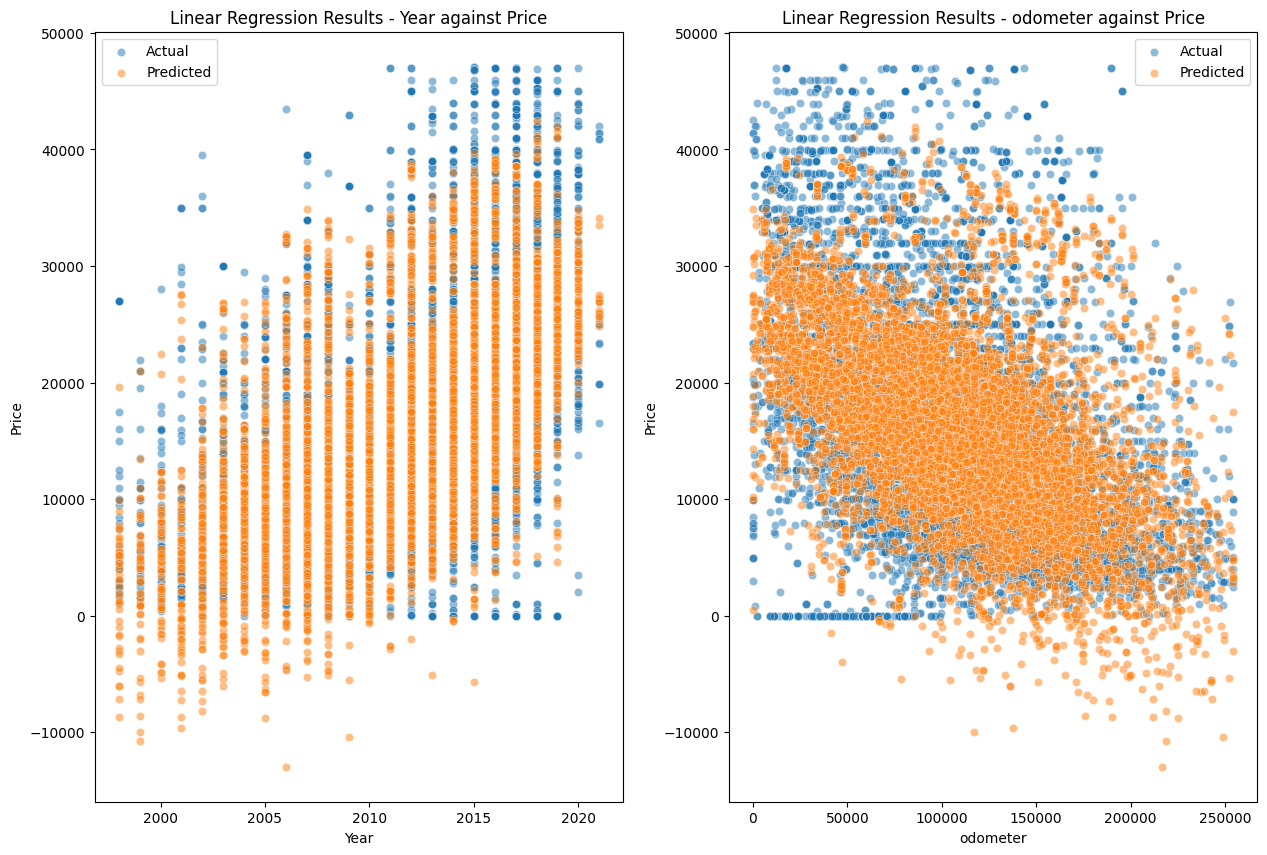

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_predicts_ln, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression Results - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_predicts_ln, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression Results - odometer against Price')
plt.show()

###LInear Regression with Polynomial Degrees

In [ ]:
# define a  Linear Regression model with Polynomial degree 2 and find MSE, MAE
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
pipeline_poly.fit(X_train, y_train)
train_predicts_poly= pipeline_poly.predict(X_train)
test_predicts_poly = pipeline_poly.predict(X_test)

train_mse_poly = mean_squared_error(y_train, train_predicts_poly)
test_mse_poly = mean_squared_error(y_test, test_predicts_poly)
train_mae_poly= mean_absolute_error(y_train, train_predicts_poly)
test_mae_poly = mean_absolute_error(y_test, test_predicts_poly)

print(f"Linear Model: train_mse={train_mse_poly}, test_mse={test_mse_poly}")
print(f"Linear Model: train_mae={train_mae_poly}, test_mae={test_mae_poly}")
print(f"Model Accuracy: {round(pipeline_poly.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {pipeline_poly.named_steps['model'].coef_}")
print(f"Model Intercepts: {pipeline_poly.named_steps['model'].intercept_}")

poly_linear_results = {
    'model': 'Poly Degree 2 Linear Regression',
    'train_mse': train_mse_poly,
    'test_mse': test_mse_poly,
    'train_mae': train_mae_poly,
    'test_mae': test_mae_poly,
    'accuracy': round(pipeline_poly.score(X_test, y_test)*100,2),
    'coefficients': pipeline_poly.named_steps['model'].coef_,
    'intercept': pipeline_poly.named_steps['model'].intercept_
}

results.append(poly_linear_results)

Linear Model: train_mse=30603946.49099977, test_mse=30131688.2118805
Linear Model: train_mae=3851.4647750863874, test_mae=3833.1896336031546
Model Accuracy: 74.03
Model Intercepts: 10201.04946449584


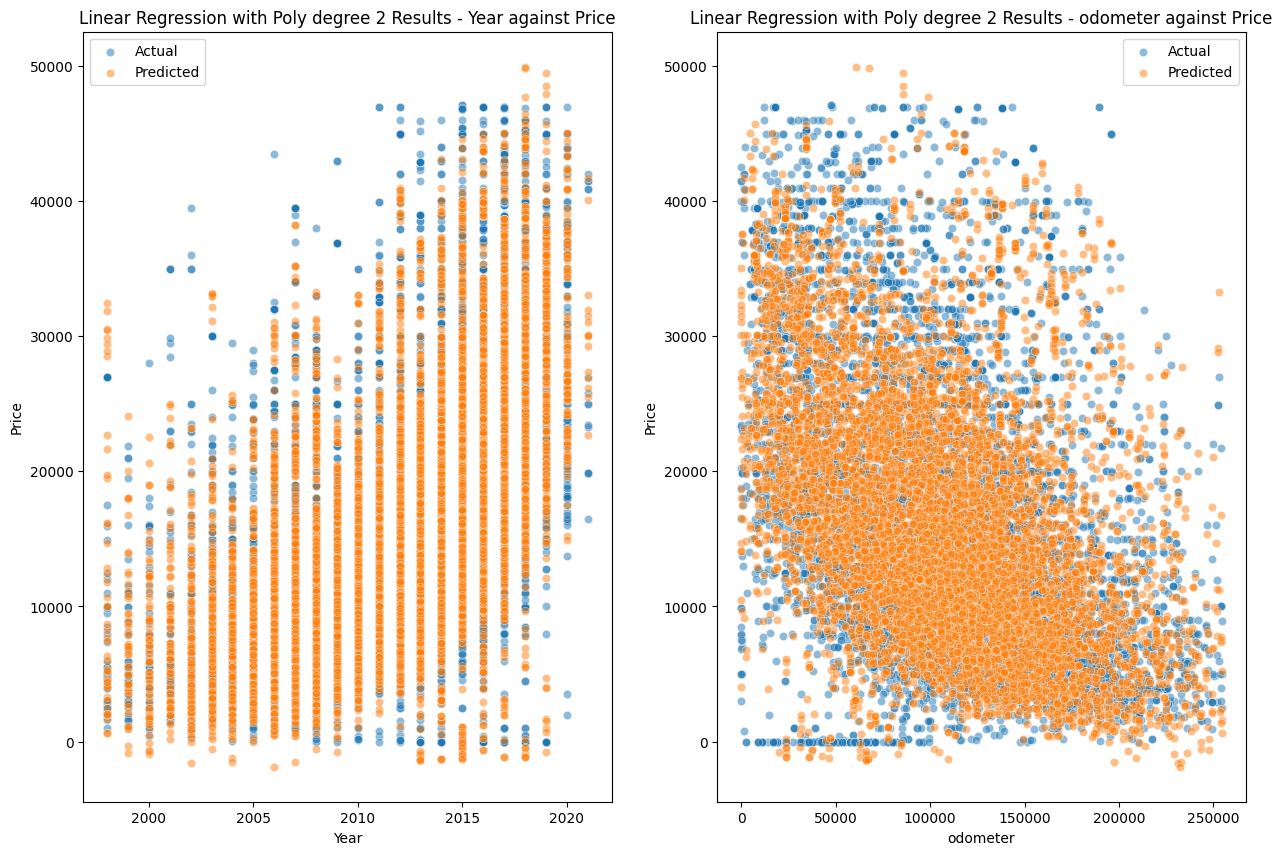

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_predicts_poly, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Poly degree 2 Results - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_predicts_poly, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Poly degree 2 Results - odometer against Price')
plt.show()

###Linear Regression with Grid Search

In [ ]:
# create a pipeline with linear regression but do not include degree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# define degree parameters to assign to Grid search
param_grid ={
    'poly__degree':[1,2,3]
}

grid_linear = GridSearchCV(pipeline, param_grid, cv=5)
grid_linear.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
#what is the best estimator and degree
best_params_linear = grid_linear.best_params_
best_model_linear = grid_linear.best_estimator_

print(f"Best Parameters: {best_params_linear}")
print(f"Best Model: {best_model_linear}")

Best Parameters: {'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])


In [ ]:
# from the best model, calculare MSE & MAE
pred_train_grid = best_model_linear.predict(X_train)
pred_test_grid = best_model_linear.predict(X_test)

train_mse_grid = mean_squared_error(y_train, pred_train_grid)
test_mse_grid = mean_squared_error(y_test, pred_test_grid)
train_mae_grid = mean_absolute_error(y_train, pred_train_grid)
test_mae_grid = mean_absolute_error(y_test, pred_test_grid)

print(f"Grid Search Linear Model: train_mse={train_mse_grid}, test_mse={test_mse_grid}")
print(f"Grid Search Linear Model: train_mae={train_mae_grid}, test_mae={test_mae_grid}")
print(f"Model Accuracy: {round(best_model_linear.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_linear.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_linear.named_steps['model'].intercept_}")

grid_linear_results={
    'model': 'Grid Search Linear Regression',
    'train_mse': train_mse_grid,
    'test_mse': test_mse_grid,
    'train_mae': train_mae_grid,
    'test_mae': test_mae_grid,
    'accuracy': round(best_model_linear.score(X_test, y_test)*100,2),
    'coefficients': best_model_linear.named_steps['model'].coef_,
    'intercept': best_model_linear.named_steps['model'].intercept_
}
results.append(grid_linear_results)

Grid Search Linear Model: train_mse=23190266.398889083, test_mse=25039965.987725727
Grid Search Linear Model: train_mae=3310.5025588082167, test_mae=3434.4330307840974
Model Accuracy: 78.42
Model Intercepts: 221970811737777.75


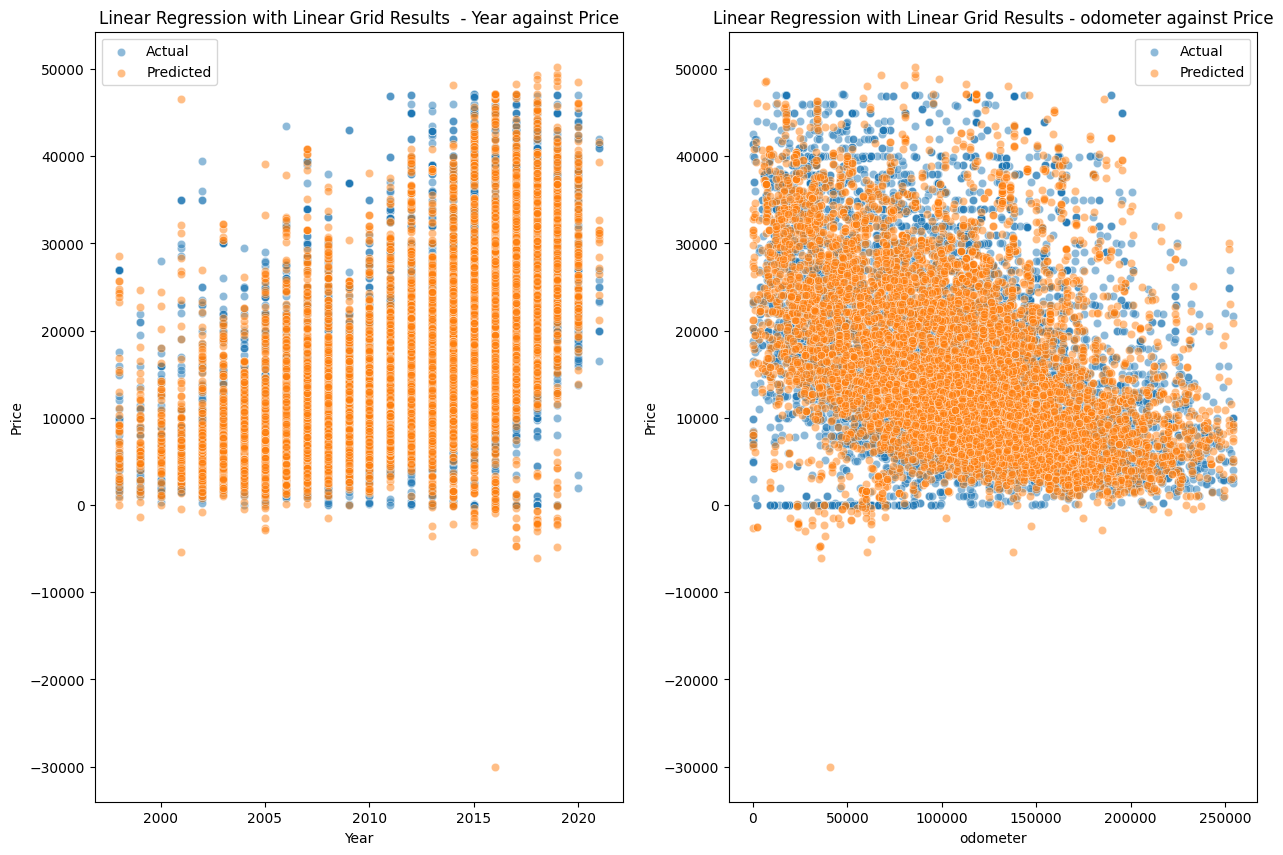

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=pred_test_grid, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Linear Grid Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=pred_test_grid, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Linear Grid Results - odometer against Price')
plt.show()

### Ridge Regression with Grid Search

In [ ]:
# create pipeline with ridge regressoion
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge())
])

param_grid={
    'poly__degree':[1,2,3],
    'model__alpha':[0.1,1,10]
}

grid_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 1, 10],
                         'poly__degree': [1, 2, 3]})

In [ ]:
# find the best alpha and degree
best_model_ridge = grid_ridge.best_estimator_
best_params_ridge = grid_ridge.best_params_

print(f"Best Parameters: {best_params_ridge}")
print(f"Best Model: {best_model_ridge}")

Best Parameters: {'model__alpha': 10, 'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=10))])


In [ ]:
preds_train_ridge = best_model_ridge.predict(X_train)
preds_test_ridge = best_model_ridge.predict(X_test)

train_mse_ridge = mean_squared_error(y_train, preds_train_ridge)
test_mse_ridge = mean_squared_error(y_test, preds_test_ridge)
train_mae_ridge = mean_absolute_error(y_train, preds_train_ridge)
test_mae_ridge = mean_absolute_error(y_test, preds_test_ridge)

print(f"Grid Search Ridge Model: train_mse={train_mse_ridge}, test_mse={test_mse_ridge}")
print(f"Grid Search Ridge Model: train_mae={train_mae_ridge}, test_mae={test_mae_ridge}")
print(f"Model Accuracy: {round(best_model_ridge.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_ridge.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_ridge.named_steps['model'].intercept_}")

grid_ridge_results={
    'model': 'Grid Search Ridge Regression',
    'train_mse': train_mse_ridge,
    'test_mse': test_mse_ridge,
    'train_mae': train_mae_ridge,
    'test_mae': test_mae_ridge,
    'accuracy': round(best_model_ridge.score(X_test, y_test)*100,2),
    'coefficients': best_model_ridge.named_steps['model'].coef_,
    'intercept': best_model_ridge.named_steps['model'].intercept_
}
results.append(grid_ridge_results)


Grid Search Ridge Model: train_mse=23190931.301430542, test_mse=25001299.050863046
Grid Search Ridge Model: train_mae=3309.63821303395, test_mae=3432.289891612481
Model Accuracy: 78.45
Model Intercepts: 8046.7901766218965


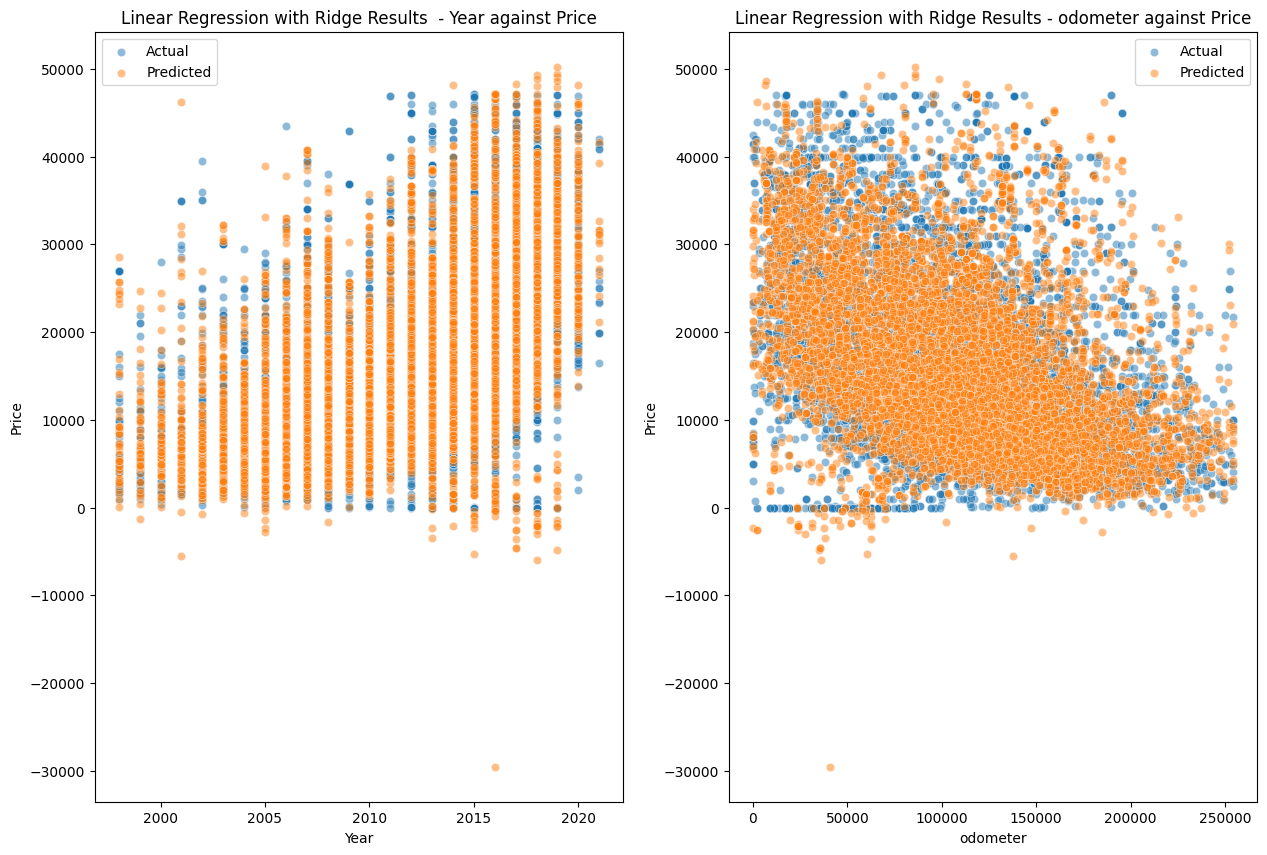

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=preds_test_ridge, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Ridge Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=preds_test_ridge, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Ridge Results - odometer against Price')
plt.show()

### Lasso Regression with Grid Search

In [ ]:
# create lasso pipeline using GridSearch

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Lasso(random_state = 42))
])

param_grid={
    'poly__degree':[1,2,3]
}

grid_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.175e+10, tolerance: 1.942e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.574e+10, tolerance: 1.946e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.451e+10, tolerance: 1.937e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Lasso(random_state=42))]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
#best model
best_model_lasso = grid_lasso.best_estimator_
best_params_lasso = grid_lasso.best_params_

print(f"Best Parameters: {best_params_lasso}")
print(f"Best Model: {best_model_lasso}")

Best Parameters: {'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Lasso(random_state=42))])


In [ ]:
train_preds_lasso = best_model_lasso.predict(X_train)
test_preds_lasso = best_model_lasso.predict(X_test)

train_mse_lasso = mean_squared_error(y_train, train_preds_lasso)
test_mse_lasso = mean_squared_error(y_test, test_preds_lasso)
train_mae_lasso = mean_absolute_error(y_train, train_preds_lasso)
test_mae_lasso = mean_absolute_error(y_test, test_preds_lasso)

print(f"Grid Search Lasso Model: train_mse={train_mse_lasso}, test_mse={test_mse_lasso}")
print(f"Grid Search Lasso Model: train_mae={train_mae_lasso}, test_mae={test_mae_lasso}")
print(f"Model Accuracy: {round(best_model_lasso.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_lasso.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_lasso.named_steps['model'].intercept_}")

grid_lasso={
    'model': 'Grid Search Lasso Regression',
    'train_mse': train_mse_lasso,
    'test_mse': test_mse_lasso,
    'train_mae': train_mae_lasso,
    'test_mae': test_mae_lasso,
    'accuracy': round(best_model_lasso.score(X_test, y_test)*100,2),
    'coefficients': best_model_lasso.named_steps['model'].coef_,
    'intercept': best_model_lasso.named_steps['model'].intercept_
}
results.append(grid_lasso)


Grid Search Lasso Model: train_mse=23196793.712723345, test_mse=24881591.58348047
Grid Search Lasso Model: train_mae=3307.836407063561, test_mae=3425.885434863457
Model Accuracy: 78.55
Model Intercepts: 8189.458825072138


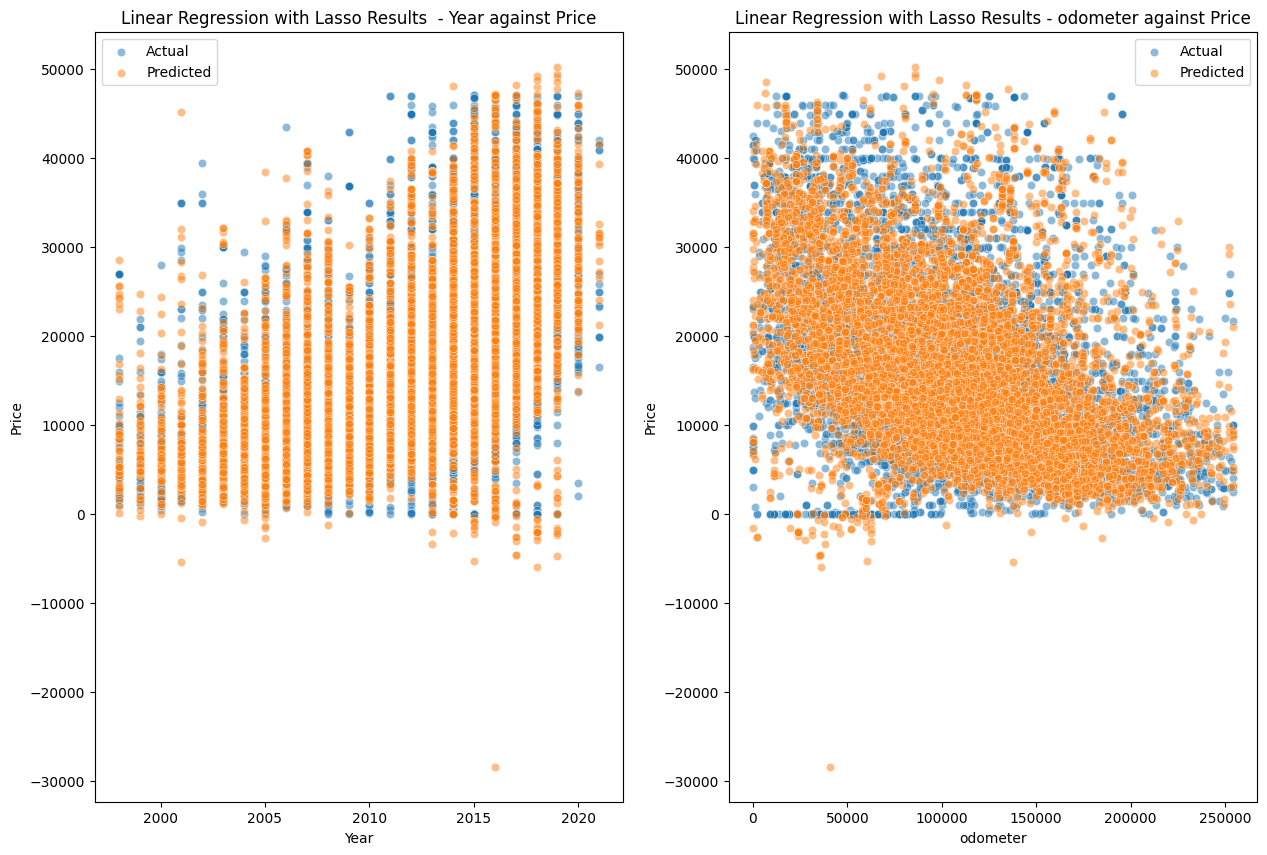

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_preds_lasso, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Lasso Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_preds_lasso, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Lasso Results - odometer against Price')
plt.show()

### Sequential Feature selection



In [ ]:
#Create a pipline with sequential feature selection

from sklearn.feature_selection import SequentialFeatureSelector

seq_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')),
    ('model', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid_seq = GridSearchCV(seq_pipeline, param_grid, cv=5)
grid_seq.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('feature_selection',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=5)),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
best_model_seq = grid_seq.best_estimator_
best_params_seq = grid_seq.best_params_

print(f"Best Parameters: {best_params_seq}")
print(f"Best Model: {best_model_seq}")

Best Parameters: {'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('feature_selection',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])


In [ ]:
train_preds_seq = best_model_seq.predict(X_train)
test_preds_seq = best_model_seq.predict(X_test)

train_mse_seq = mean_squared_error(y_train, train_preds_seq)
test_mse_seq = mean_squared_error(y_test, test_preds_seq)
train_mae_seq= mean_absolute_error(y_train, train_preds_seq)
test_mae_seq = mean_absolute_error(y_test, test_preds_seq)

print(f"Grid Search Lasso Model: train_mse={train_mse_seq}, test_mse={test_mse_seq}")
print(f"Grid Search Lasso Model: train_mae={train_mae_seq}, test_mae={test_mae_seq}")
print(f"Model Accuracy: {round(best_model_seq.score(X_test, y_test)*100,2)}")
print(f"Model Intercepts: {best_model_seq.named_steps['model'].intercept_}")

grid_seq ={
    'model': 'Grid Search Sequential Feature Selection',
    'train_mse': train_mse_seq,
    'test_mse': test_mse_seq,
    'train_mae': train_mae_seq,
    'test_mae': test_mae_seq,
    'accuracy': round(best_model_seq.score(X_test, y_test)*100,2),
    'coefficients': best_model_seq.named_steps['model'].coef_,
    'intercept': best_model_seq.named_steps['model'].intercept_
}
results.append(grid_seq)

Grid Search Lasso Model: train_mse=47075735.469534315, test_mse=45955758.80685837
Grid Search Lasso Model: train_mae=4997.503950180239, test_mae=4958.46365713201
Model Accuracy: 60.39
Model Intercepts: 14921.807818687415


### K-Fold Feature selection

In [ ]:
from sklearn.model_selection import KFold

# create a linear regression pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
# best degree for KFOLD
best_model_kfold = grid_search.best_estimator_
best_params_kfold = grid_search.best_params_

print(f"Best Parameters: {best_params_kfold}")
print(f"Best Model: {best_model_kfold}")

Best Parameters: {'poly__degree': 2}
Best Model: Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])


In [ ]:
train_preds_kf = best_model_kfold.predict(X_train)
test_preds_kf = best_model_kfold.predict(X_test)

  # Calculate evaluation metrics
train_mse_kf = mean_squared_error(y_train, train_preds_kf)
test_mse_kf = mean_squared_error(y_test, test_preds_kf)
train_mae_kf= mean_absolute_error(y_train, train_preds_kf)
test_mae_kf = mean_absolute_error(y_test, test_preds_kf)

print(f"Grid Search Lasso Model: train_mse={train_mse_kf}, test_mse={test_mse_kf}")
print(f"Grid Search Lasso Model: train_mae={train_mae_kf}, test_mae={test_mae_kf}")
print(f"Model Accuracy: {round(best_model_kfold.score(X_test, y_test)*100,2)}")
print(f"Model Intercepts: {best_model_kfold.named_steps['linear_regression'].intercept_}")

grid_kfold={
    'model': 'Grid Search K-Fold Feature Selection',
    'train_mse': train_mse_kf,
    'test_mse': test_mse_kf,
    'train_mae': train_mae_kf,
    'test_mae': test_mae_kf,
    'accuracy': round(best_model_kfold.score(X_test, y_test)*100,2),
    'coefficients': best_model_kfold.named_steps['linear_regression'].coef_,
    'intercept': best_model_kfold.named_steps['linear_regression'].intercept_
}
results.append(grid_kfold)

Grid Search Lasso Model: train_mse=30603946.490999695, test_mse=30131688.21188045
Grid Search Lasso Model: train_mae=3851.464775086389, test_mae=3833.1896336031655
Model Accuracy: 74.03
Model Intercepts: 15759.25591633592


**Observation** : All the models performed better with minor differences, the scatter plots show similar distrubution when compared to actual and model predictions.

In [ ]:
#create data frame with all the model results

model_results = pd.DataFrame(results)
model_results.sort_values(by='accuracy', ascending=False).drop_duplicates(subset=['model'])

model   train_mse    test_mse  \
4              Grid Search Lasso Regression 23196793.71 24881591.58   
3              Grid Search Ridge Regression 23190931.30 25001299.05   
2             Grid Search Linear Regression 23190266.40 25039965.99   
1           Poly Degree 2 Linear Regression 30603946.49 30131688.21   
6      Grid Search K-Fold Feature Selection 30603946.49 30131688.21   
5  Grid Search Sequential Feature Selection 47075735.47 45955758.81   
0                         Linear Regression 49692607.43 48487860.42   

   train_mae  test_mae  accuracy  \
4    3307.84   3425.89     78.55   
3    3309.64   3432.29     78.45   
2    3310.50   3434.43     78.42   
1    3851.46   3833.19     74.03   
6    3851.46   3833.19     74.03   
5    4997.50   4958.46     60.39   
0    5151.09   5137.33     58.21   

                                        coefficients          intercept  
4  [401.7141589449364, 4600.200766681103, -521.52...            8189.46  
3  [431.9281290376724, 4530.882307429215, -553.80...            8046.79  
2  [442.5852416808394, 4577.502509460919, -552.50... 221970811737777.75  
1  [-203.59445882077864, 5038.6715351531775, 112....           10201.05  
6  [18098.246249701577, -719211.9539469556, -5412...           15759.26  
5  [5106.775451691837, 4021.0160408403144, -2833....           14921.81  
0  [-297.26203755475433, 4196.947105308436, 283.9...           15759.26

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

It took lot of time to execute all the models with different degree and alpha values, i limited myself to degree upto 3 for Grid Search due to heavy computational time, In most of the cases , i got best degree is 3 and alpha 10.
From the data frame I created (I followed the apprach by a github user 'jaruizsys'), i compared the MSE and MAE values and picked one better model

Text(0, 0.5, 'MSE')

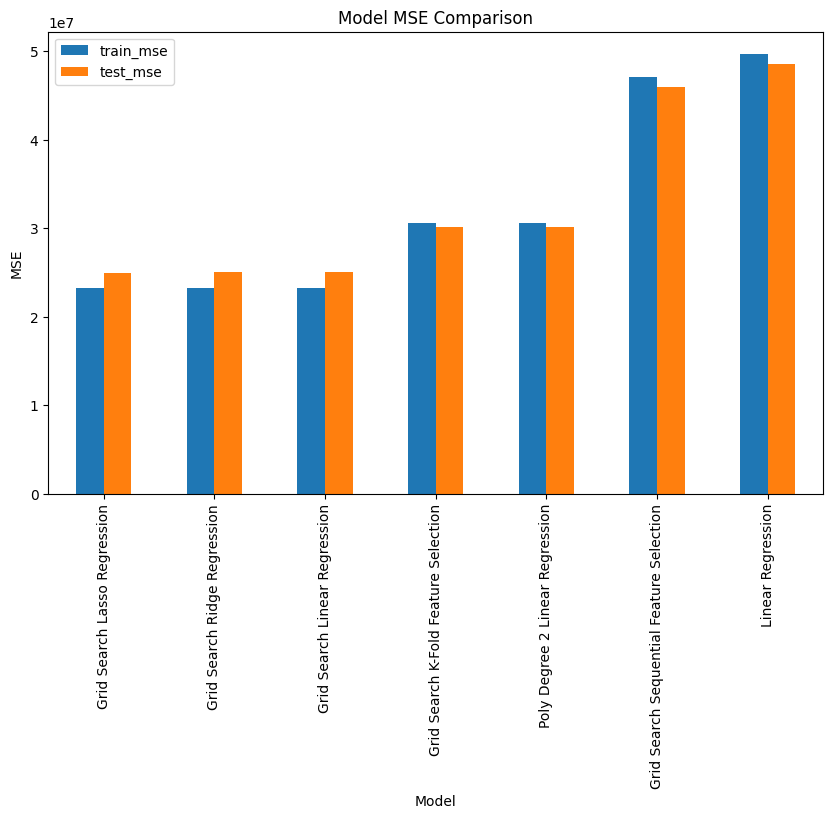

In [ ]:
df_results = model_results[['model','train_mse','test_mse']].sort_values(by='test_mse', ascending=True).drop_duplicates(subset=['model'])
df_results.plot(x='model',kind='bar',figsize=(10,6))
plt.title('Model MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')


Text(0, 0.5, 'MAE')

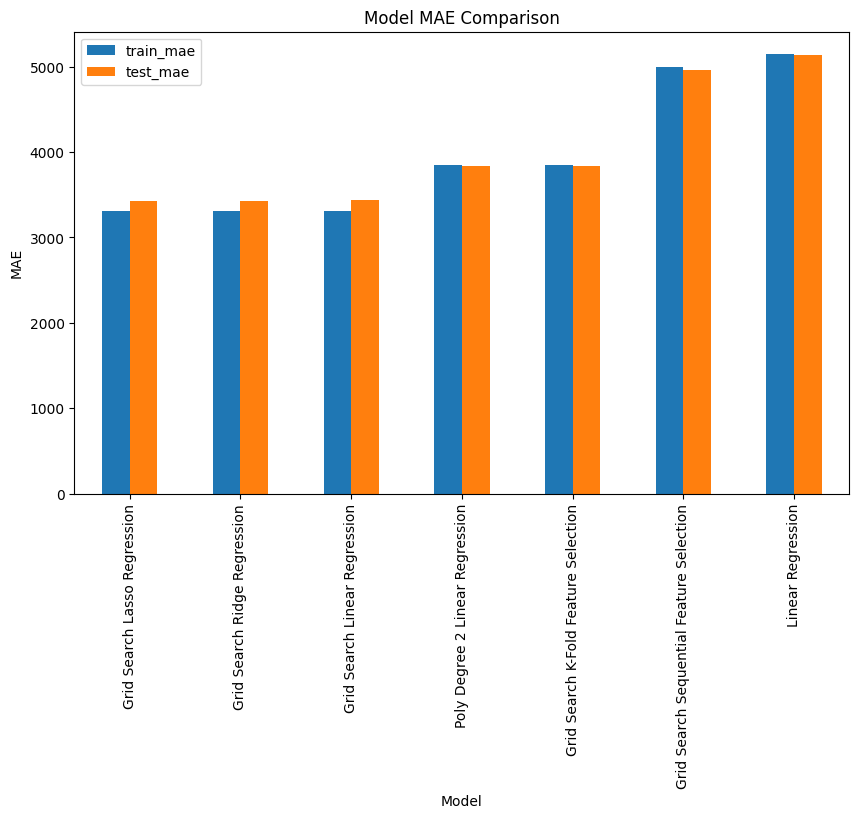

In [ ]:
df_results = model_results[['model','train_mae','test_mae']].sort_values(by='test_mae', ascending=True).drop_duplicates(subset=['model'])
df_results.plot(x='model',kind='bar',figsize=(10,6))
plt.title('Model MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

Observation: From the above two diagrams and from the data frame it is obvious that the lasso regression has less MSE and MAE value

In [ ]:
# create Permutation importance for lasso model
from sklearn.inspection import permutation_importance
permu = permutation_importance(best_model_lasso, X_test, y_test,n_repeats=30,random_state=0)
importance_df = pd.DataFrame(permu.importances_mean, index=X_test.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

<ipython-input-152-d31fca71db72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x=importance_df.index, y=importance_df.Importance, ax=ax, palette='dark')
<ipython-input-152-d31fca71db72>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


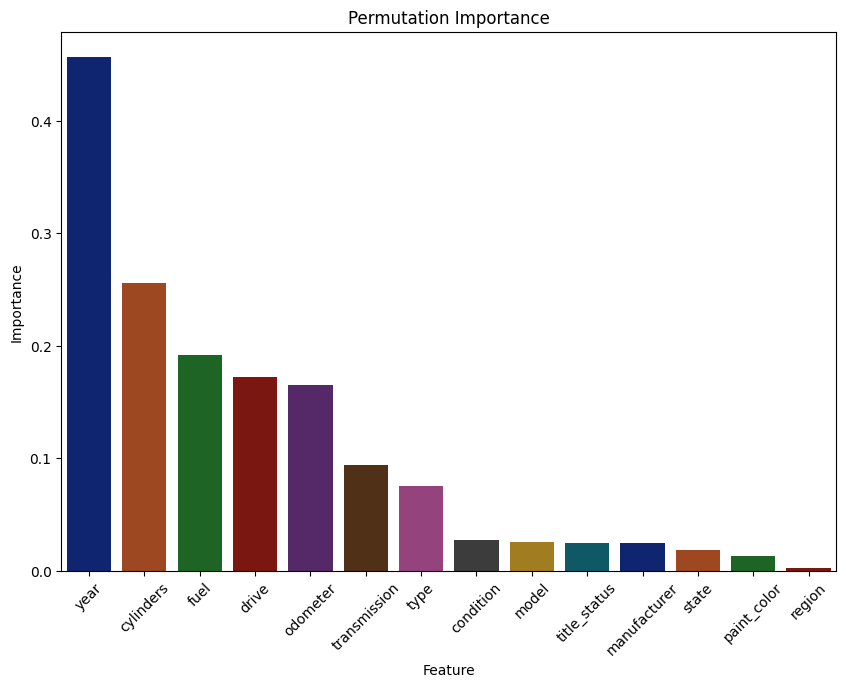

In [ ]:
#draw plot of importance using sns
fig,ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(x=importance_df.index, y=importance_df.Importance, ax=ax, palette='dark')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Permutation Importance')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
clean_vehicles.head()

region  price    year  manufacturer  model  condition  cylinders  fuel  \
0      28   4000 2002.00            35   1383          0          3     2   
2      28   9000 2008.00            22   2747          0          3     2   
3      28   8950 2011.00            10   1702          0          5     2   
6      28   9400 2008.00            23    669          2          5     2   
7      28   7300 2007.00            20   3317          2          5     2   

   odometer  title_status  transmission  drive  type  paint_color  state  
0 155000.00             0             0      1     9            1      1  
2  56700.00             0             0      2     2           10      1  
3 164000.00             0             0      1    10           10      1  
6 129473.00             0             0      2     9            9      1  
7 181000.00             0             0      1     0           10      1

In [ ]:
clean_vehicles.head()

region  price    year  manufacturer  model  condition  cylinders  fuel  \
0      28   4000 2002.00            35   1383          0          3     2   
2      28   9000 2008.00            22   2747          0          3     2   
3      28   8950 2011.00            10   1702          0          5     2   
6      28   9400 2008.00            23    669          2          5     2   
7      28   7300 2007.00            20   3317          2          5     2   

   odometer  title_status  transmission  drive  type  paint_color  state  \
0 155000.00             0             0      1     9            1      1   
2  56700.00             0             0      2     2           10      1   
3 164000.00             0             0      1    10           10      1   
6 129473.00             0             0      2     9            9      1   
7 181000.00             0             0      1     0           10      1   

   decpde_manu  
0           35  
2           22  
3           10  
6           23  
7           20

In [ ]:
le_encorers['condition']

{'excellent': 0, 'good': 2, 'like new': 3, 'fair': 1, 'salvage': 5, 'new': 4}

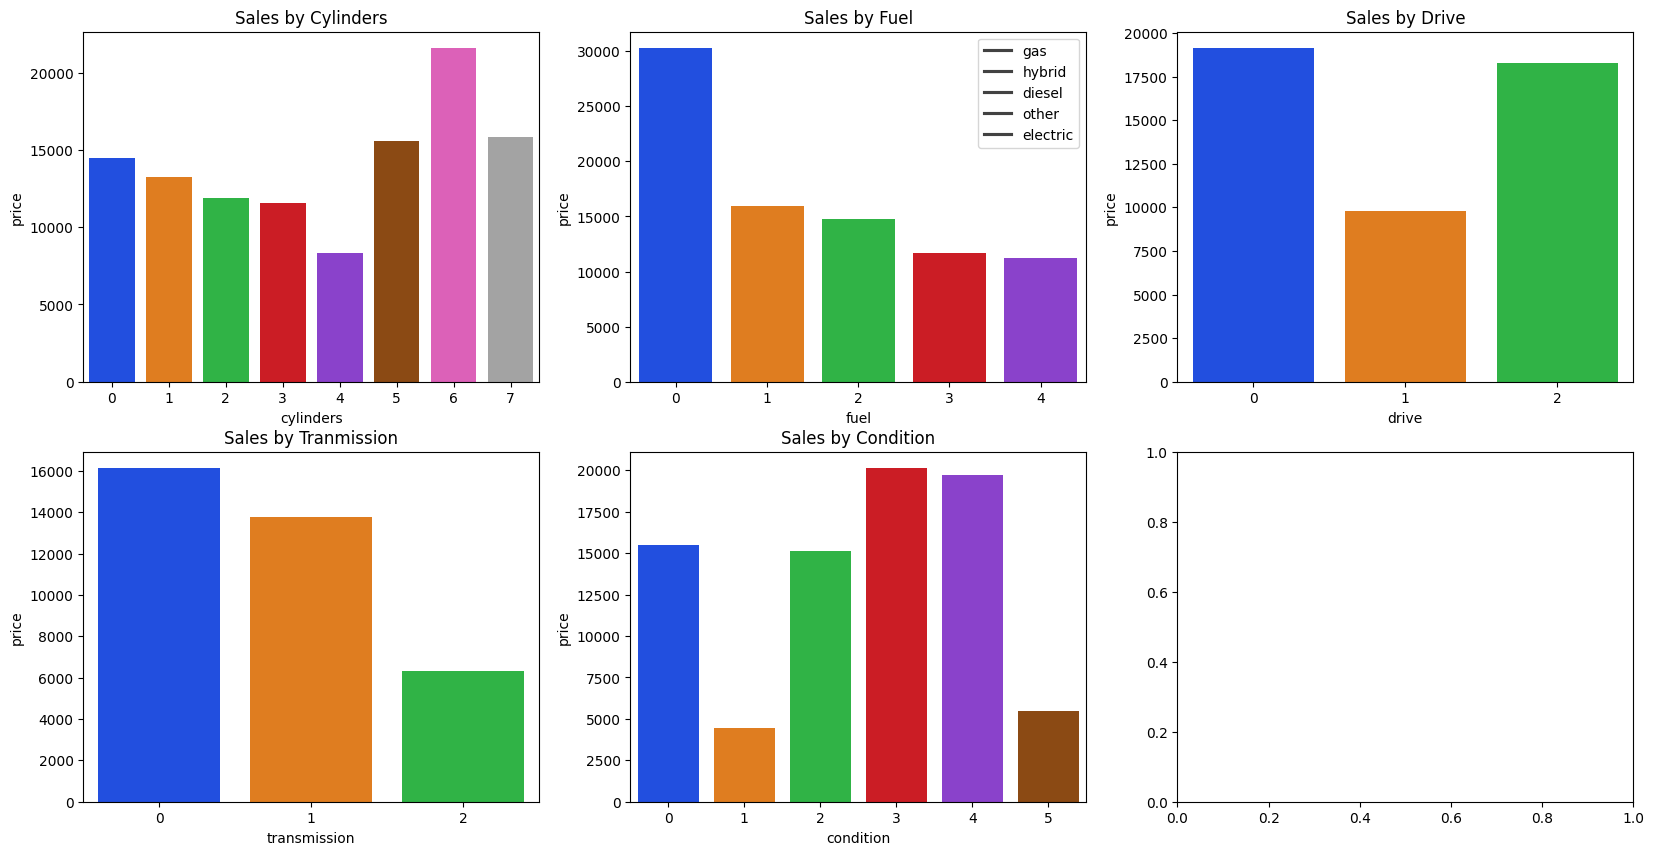

In [ ]:
# draw plots
fig, ax = plt.subplots(2,3, figsize=(20,10))
# sales by cylinders
vehicle_cylinders_price = clean_vehicles.groupby('cylinders')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_cylinders_price.index, y=vehicle_cylinders_price, ax=ax[0][0], hue=vehicle_cylinders_price.index, legend=False, palette='bright')
fig.set_title('Sales by Cylinders')
# sales by fuel
vehicle_fuel_price = clean_vehicles.groupby('fuel')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_fuel_price.index, y=vehicle_fuel_price, ax=ax[0][1], hue=vehicle_fuel_price.index, legend=False, palette='bright')
fig.set_title('Sales by Fuel')
fig.legend(loc='upper right' ,labels = le_encorers['fuel'])
vehicle_drive_price = clean_vehicles.groupby('drive')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_drive_price.index, y=vehicle_drive_price, ax=ax[0][2], hue=vehicle_drive_price.index, legend=False, palette='bright')
fig.set_title('Sales by Drive')
vehicle_transmission_price = clean_vehicles.groupby('transmission')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_transmission_price.index, y=vehicle_transmission_price, ax=ax[1][0], hue=vehicle_transmission_price.index, legend=False, palette='bright')
fig.set_title('Sales by Tranmission')
vehicle_condition_price = clean_vehicles.groupby('condition')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_condition_price.index, y=vehicle_condition_price, ax=ax[1][1], hue=vehicle_condition_price.index, legend=False, palette='bright')
fig.set_title('Sales by Condition')
#vehicle_type_price = clean_vehicles.groupby('type')['price'].mean().sort_values(ascending=False)
#fig = sns.barplot(x=vehicle_type_price.index, y=vehicle_type_price, ax=ax[1][2], hue=vehicle_type_price.index, legend=False, palette='bright')
#fig.set_title('Sales by Odometer')
plt.show()

[{28: 28,
  80: 80,
  106: 106,
  116: 116,
  145: 145,
  212: 212,
  217: 217,
  354: 354,
  8: 8,
  160: 160,
  103: 103,
  214: 214,
  261: 261,
  269: 269,
  306: 306,
  352: 352,
  387: 387,
  101: 101,
  110: 110,
  155: 155,
  187: 187,
  345: 345,
  18: 18,
  56: 56,
  114: 114,
  120: 120,
  143: 143,
  146: 146,
  148: 148,
  190: 190,
  206: 206,
  207: 207,
  213: 213,
  216: 216,
  250: 250,
  255: 255,
  277: 277,
  278: 278,
  286: 286,
  293: 293,
  294: 294,
  297: 297,
  299: 299,
  0: 0,
  310: 310,
  339: 339,
  340: 340,
  361: 361,
  364: 364,
  386: 386,
  35: 35,
  62: 62,
  77: 77,
  85: 85,
  108: 108,
  137: 137,
  271: 271,
  374: 374,
  86: 86,
  131: 131,
  225: 225,
  239: 239,
  366: 366,
  76: 76,
  73: 73,
  107: 107,
  115: 115,
  117: 117,
  134: 134,
  152: 152,
  174: 174,
  230: 230,
  243: 243,
  246: 246,
  252: 252,
  256: 256,
  258: 258,
  300: 300,
  315: 315,
  328: 328,
  331: 331,
  342: 342,
  343: 343,
  350: 350,
  14: 14,
  15: 15,
  